In [1]:
import pandas as pd
import tensorflow as tf
from random import randint
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"/kaggle/input/Kannada-MNIST/train.csv")
df.shape

(60000, 785)

### Labeling

In [2]:
x_df = df.drop(labels='label',axis=1)
y_df = df[['label']]
y_df.shape,x_df.shape,df.shape

((60000, 1), (60000, 784), (60000, 785))

### Visualization

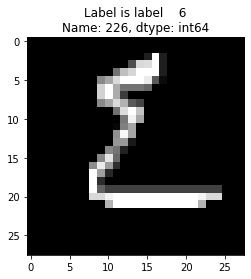

In [3]:
rand = randint(0,300)
pixels = np.array(x_df.iloc[rand],dtype='uint8')
pixels = pixels.reshape((28, 28))
plt.title('Label is {label}'.format(label=y_df.iloc[rand]))
plt.imshow(pixels, cmap='gray')
plt.show()

### Train-test split

In [4]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,train_size=0.2)

In [5]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12000, 784), (48000, 784), (12000, 1), (48000, 1))

### Model

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(784,)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs = 100)
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

2023-01-19 08:41:03.809777: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-19 08:41:04.153312: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
375/375 [==============================] - 2s 5ms/step - loss: 3.5277 - accuracy: 0.8638
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.5277 - accuracy: 0.9494
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.3089 - accuracy: 0.9668
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2425 - accuracy: 0.9724
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.2236 - accuracy: 0.9749
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1857 - accuracy: 0.9778
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.2522 - accuracy: 0.9760
Epoch 8/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1573 - accuracy: 0.9830
Epoch 9/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1159 - accuracy: 0.9860
Epoch 10/100
375/375 [==============================] - 1s 4ms/step - loss: 0.1297 - accura

### Submission

In [7]:
sample_submit = pd.read_csv("/kaggle/input/Kannada-MNIST/sample_submission.csv")
real_test = pd.read_csv("/kaggle/input/Kannada-MNIST/test.csv")

In [8]:
real_test = real_test.iloc[:, 1:].to_numpy()
real_test = real_test/255
real_test = real_test.astype("float32")
real_test = real_test.reshape(-1, 28, 28, 1)

In [9]:
prediction = model.predict(real_test)

prediction = prediction.argmax(axis = 1)

In [10]:
sample_submit["label"] = prediction
sample_submit.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,6


In [11]:
sample_submit.to_csv("submission.csv", index = False)